In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


In [2]:
df=pd.read_csv('database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape


(907, 27)

In [4]:
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [5]:
df.isna().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
df.drop(columns=['country','other_fuel1','other_fuel2','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh'],inplace=True)

In [7]:
df.head()

,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,owner,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [8]:
a=df['source'].unique()

In [9]:
len(a)

191

In [10]:
df.drop(columns=['name','gppd_idnr','url','owner','geolocation_source','year_of_capacity_data'],inplace=True)


In [11]:
df.head()

,country_long,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,India,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,India,39.2,21.9038,69.3732,Wind,NaN,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,India,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [12]:
df.shape

(907, 13)

In [13]:
df.drop(columns=['commissioning_year','longitude','latitude'],inplace=True)
df.shape

(907, 10)

In [14]:
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,India,98.0,Coal,Ultratech Cement ltd,NaN,NaN,NaN,NaN,NaN,NaN
2,India,39.2,Wind,CDM,NaN,NaN,NaN,NaN,NaN,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [15]:
df.isna().sum()

country_long                0
capacity_mw                 0
primary_fuel                0
source                      0
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [16]:
df['generation_gwh_2014']= df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].mean())
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,2431.823590,NaN,NaN,NaN,NaN,NaN
1,India,98.0,Coal,Ultratech Cement ltd,2431.823590,NaN,NaN,NaN,NaN,NaN
2,India,39.2,Wind,CDM,2431.823590,NaN,NaN,NaN,NaN,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [17]:
df['generation_gwh_2015']= df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].mean())
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,2431.823590,2428.226946,NaN,NaN,NaN,NaN
1,India,98.0,Coal,Ultratech Cement ltd,2431.823590,2428.226946,NaN,NaN,NaN,NaN
2,India,39.2,Wind,CDM,2431.823590,2428.226946,NaN,NaN,NaN,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [18]:
df['generation_gwh_2016']= df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].mean())
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN
1,India,98.0,Coal,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN
2,India,39.2,Wind,CDM,2431.823590,2428.226946,2467.936859,NaN,NaN,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [19]:
df['generation_gwh_2017']= df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].mean())
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN
1,India,98.0,Coal,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN
2,India,39.2,Wind,CDM,2431.823590,2428.226946,2467.936859,2547.759305,NaN,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [20]:
df['generation_gwh_2018']= df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].mean())
df.head()

,country_long,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,India,2.5,Solar,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
1,India,98.0,Coal,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
2,India,39.2,Wind,CDM,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN
3,India,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128,Central Electricity Authority
4,India,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [21]:
a=df['primary_fuel'].unique()
a

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [22]:
df.drop(columns=['country_long','generation_data_source'],inplace=True)

In [23]:
df.head()

,capacity_mw,primary_fuel,source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,National Renewable Energy Laboratory,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,Coal,Ultratech Cement ltd,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,Wind,CDM,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,Gas,Central Electricity Authority,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,Central Electricity Authority,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [24]:
df.isna().sum()

capacity_mw            0
primary_fuel           0
source                 0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

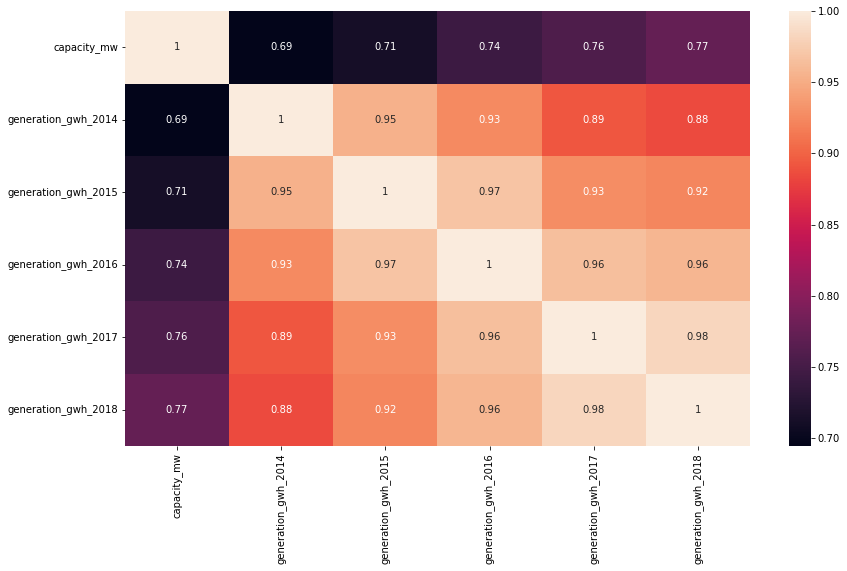

In [26]:
df_corr=df.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})


In [28]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['primary_fuel'])
pd.Series(df2)


0      6
1      1
2      7
3      2
4      1
      ..
902    1
903    6
904    7
905    1
906    7
Length: 907, dtype: int32

In [37]:
df.drop(columns=['source'], inplace=True)

In [38]:
df.head()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,Solar,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,Coal,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,Wind,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,Gas,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,Coal,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [40]:
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(df['primary_fuel'])
pd.Series(df2)
df['primary_fuel']=df2
df.head()

,capacity_mw,primary_fuel,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,6,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,98.0,1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,39.2,7,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,135.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,1,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


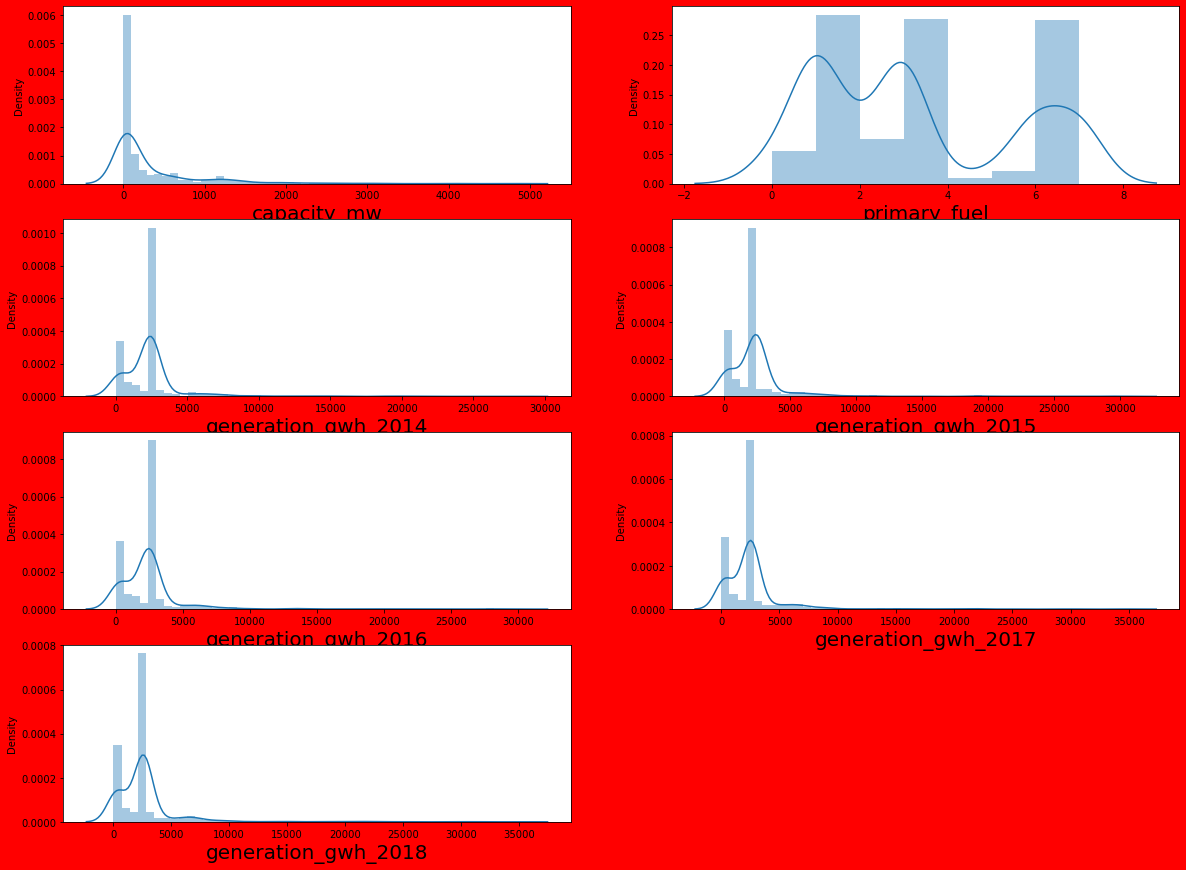

In [43]:
plt.figure(figsize=(20,15), facecolor='red')		
plotnumber=1		
		
for column in df:		
	if plotnumber<=8:	
		ax=plt.subplot(4,2,plotnumber)
		sns.distplot(df[column])
		plt.xlabel(column,fontsize=20)
		
	plotnumber+=1	
plt.show()


In [44]:
y=df['capacity_mw']
X=df.drop(columns=['capacity_mw','primary_fuel'])

y.head()



0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [45]:
X.head()

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,617.789264,843.747000,886.004428,663.774500,626.239128
4,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [46]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression


In [48]:
scaler=StandardScaler()
X_Scaled=scaler.fit_transform(X)
X_Scaled


array([[ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16],
       [ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16],
       [ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16],
       ...,
       [ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16],
       [ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16],
       [ 1.70709359e-16,  0.00000000e+00,  0.00000000e+00,
        -1.55741196e-16,  1.50124402e-16]])

In [49]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,y, test_size=0.25, random_state=333)


In [50]:
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [52]:
print('capacity might be:', regression.predict(scaler.transform([[2431.823590,2428.226946,2467.936859,2547.759305,2600.804099]])))


capacity might be: [331.03660879]


In [56]:
regression.score(x_train,y_train)

0.6244937260322363

In [57]:
regression.score(x_test,y_test)

0.508817427610671

In [58]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

lassocv=LassoCV(alphas=None, max_iter=10)
lassocv.fit(x_train,y_train)

alpha=lassocv.alpha_
alpha

lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train, y_train)

lasso_reg.score(x_test, y_test)


0.524216782525141

In [65]:
y=df['primary_fuel']
X=df.drop(columns=['capacity_mw','primary_fuel'])

y.head()

                 
                



0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

In [66]:
X.head()

,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
1,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
2,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099
3,617.789264,843.747000,886.004428,663.774500,626.239128
4,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [67]:
x_train,x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=105)		




In [69]:
def metric_score(clf, x_train,x_test, y_train, y_test, train=True):		
	if train:	
		y_pred=clf.predict(x_train)
		print(f"accuracy score: {accuracy_score(y_train, y_pred) *100:.2f}%")
		
	elif train==False:	
		pred=clf.predict(x_test)
		print(f"accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
		print('classification report', classification_report(y_test, pred, digits=2))

In [70]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [71]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)




accuracy score: 63.09%


In [72]:
metric_score(clf, x_train, x_test, y_train, y_test, train=False)

accuracy score: 47.58%
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.74      0.51      0.60        67
           2       0.50      0.30      0.37        20
           3       0.73      0.60      0.65        62
           4       0.00      0.00      0.00         0
           5       0.50      0.20      0.29         5
           6       0.26      1.00      0.41        30
           7       0.00      0.00      0.00        32

    accuracy                           0.48       227
   macro avg       0.34      0.33      0.29       227
weighted avg       0.51      0.48      0.45       227



In [104]:
grid_param={'criterion': ['gini', 'entropy'],'max_depth':range(10,20),'min_samples_leaf':range(2,8), 'min_samples_split':range(3,10),'max_leaf_nodes':range(3,20)}


In [105]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=6,n_jobs=-1)


In [106]:
grid_search.fit(x_train, y_train)

best_parameters=grid_search.best_params_
print(best_parameters)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 19, 'min_samples_leaf': 3, 'min_samples_split': 6}


In [157]:
clf=DecisionTreeClassifier(criterion='entropy', max_depth= 10, max_leaf_nodes= 20, min_samples_leaf= 9, min_samples_split= 7)

clf.fit(x_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=10, max_leaf_nodes=20,
                       min_samples_leaf=9, min_samples_split=7)

In [158]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)




accuracy score: 50.74%


In [159]:
metric_score(clf, x_train, x_test, y_train, y_test, train=False)

accuracy score: 46.26%
classification report               precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.80      0.52      0.63        67
           2       0.20      0.10      0.13        20
           3       0.69      0.60      0.64        62
           5       0.50      0.20      0.29         5
           6       0.26      1.00      0.41        30
           7       0.00      0.00      0.00        32

    accuracy                           0.46       227
   macro avg       0.35      0.35      0.30       227
weighted avg       0.48      0.46      0.43       227

